# Introduction

Fortunately, with libraries such as Scikit-Learn, it’s now easy to build and use almost any machine learning algorithm. But it’s helpful to have an idea of how a machine learning model works under the hood. This lets us diagnose the model when it’s underperforming or explain how it makes decisions, which is crucial if we want to convince others to trust our models.
In this assignment, we’ll look at how to build and use the Decision Tree and the Random Forest in Python. We’ll start by understanding how a single decision tree makes classifications on a simple problem. Then, we’ll work our way to using a random forest on a real-world data science problem.

# Dataset

The dataset we will use in this assignment is the Sonar dataset.

This is a dataset that describes sonar chirp returns bouncing off different surfaces. The 60 predictors are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders. There are 208 observations.

It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

By predicting the class with the most observations in the dataset (M or mines) the Zero Rule Algorithm can achieve an accuracy of 53%.

You can learn more about this dataset at the UCI Machine Learning repository.
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

Download the dataset for free and place it in the "data" folder in your working directory with the filename sonar.all-data.csv.

# Import section

In [2]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(2020)
random.seed(2020)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [4]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel, RFECV, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# Preprocess data

Read data and convert targets to integers 1 and 0.

In [5]:
PATH = 'data/'
df = pd.read_csv(PATH+'sonar-all-data.csv', header=None)
df.columns = [f'feat_{col}' if col!=60 else 'target' for col in df.columns]
df['target'] = df['target'].map({'M': 1, 'R': 0})
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [6]:
df['target'].value_counts()

1    111
0     97
Name: target, dtype: int64

# Split data (train and test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=2020)

# Cost functions

In this section you should implement two cost functions. Any of these can be used in the model.

## Gini index

In [8]:
def gini_index(x):
    """ Calculate Gini Index for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Gini index
    """    
    if len(x) == 0:
        return 0.0
    p = np.bincount(x) / len(x)
    return 1 - np.sum(p*p)

In [9]:
target = df['target'].values
gini_index(target)

0.4977348372781065

In [10]:
#TEST
my_target = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1])
my_target
gini_index(my_target)

0.4949999999999999

In [11]:
def gini_gain(parent_node, splits):
    """ Calculate Gini Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Gini gain
    """       
    splits_gini = np.sum([gini_index(split)*(len(split)/len(parent_node)) for split in splits])
    return gini_index(parent_node) - splits_gini

In [12]:
splits = [np.random.choice(df['target'].values, 100), np.random.choice(df['target'].values, 108)]
gini_gain(target, splits)

-0.0003705758273065962

## Entropy

In [13]:
def entropy(x):
    """ Calculate Entropy for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Entropy
    """
    if len(x) == 0:
        return 0.0
    p = np.clip(np.bincount(x) / len(x), 1e-15, 1.)
    return -np.sum(p * np.log(p))

In [14]:
def information_gain(parent_node, splits):
    """ Calculate Information Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Information Gain
    """     
    splits_entropy = np.sum([entropy(split)*(len(split)/len(parent_node)) for split in splits])
    return entropy(parent_node) - splits_entropy

# Split function

Implement split functions

In [15]:
def split(X, y, value):
    """ Split y-values in order to calculate gain later
    Args:
        X: 1-dimensional numpy-array of data predictor with shape (N,)
        y: 1-dimensional numpy-array of targets with shape (N,)
        value (float): the value by which the X should be splitted
    Returns:
        Two 1-dimensional numpy-arrays with targets related to splits
    """      
    left_mask = X < value
    right_mask = X >= value
    return y[left_mask], y[right_mask]


def split_dataset(X, y, column, value):
    """ Split dataset by a particular column and value
    Args:
        X: 2-dimensional numpy-array (N, num_feats). N-number of samples
        y: 1-dimensional numpy-array of targets with shape (N,)  
        column (int): the column by which the X should be splitted
        value (float): the value by which the column should be splitted
    Returns:
        Two 2-dimensional numpy-arrays with data and two 1-dimensional numpy-arrays with targets related to splits
        left_X, right_X, left_y, right_y
    """       
    left_mask = X[:, column] < value
    right_mask = X[:, column] >= value
    left_y, right_y = y[left_mask], y[right_mask]
    left_X, right_X = X[left_mask], X[right_mask]
    return left_X, right_X, left_y, right_y

# Decision tree

In [16]:
class Tree(object):
    """A decision tree classifier.

    Args:
        criterion : {"gini_gain", "information_gain"}
    """
    def __init__(self, criterion=None):
        self.impurity = None
        self.threshold = None
        self.column_index = None
        self.outcome_probs = None
        self.criterion = criterion
        self.left_child = None
        self.right_child = None

    @property
    def is_terminal(self):
        """ Define is it terminal node
        """          
        return not bool(self.left_child and self.right_child)

    def _find_splits(self, X):
        """Find all possible split values."""
        split_values = set()

        # Get unique values in a sorted order
        x_unique = list(np.unique(X))
        for i in range(1, len(x_unique)):
            # Find a point between two values
            average = (x_unique[i - 1] + x_unique[i]) / 2.0
            split_values.add(average)

        return list(split_values)

    def _find_best_split(self, X, y, n_features):
        """Find best feature and value for a split. Greedy algorithm."""

        # Sample random subset of features
        subset = random.sample(list(range(0, X.shape[1])), n_features)
        max_gain, max_col, max_val = None, None, None

        for column in subset:
            split_values = self._find_splits(X[:, column])
            for value in split_values:
                splits = split(X[:, column], y, value)
                gain = self.criterion(y, splits)

                if (max_gain is None) or (gain > max_gain):
                    max_col, max_val, max_gain = column, value, gain
        return max_col, max_val, max_gain

    def fit(self, X, y, n_features=None, max_depth=None):
        """Fit model.

        Args:
            X (numpy-array): The training input samples. 2-dimensional numpy array.
            y (numpy-array): The target values. 1-dimensional numpy array.
            n_features (int): The number of features when fit is performed (default: all features)
            max_depth (int): The maximum depth of the tree. If None, then nodes are expanded until
                             all leaves are pure.
        """        
        try:
            # Exit from recursion using assert syntax
            if max_depth is not None:
                assert max_depth > 0
                max_depth -= 1

            if n_features is None:
                n_features = X.shape[1]

            column, value, gain = self._find_best_split(X, y, n_features)
            assert gain is not None

            self.column_index = column
            self.threshold = value
            self.impurity = gain

            # Split dataset
            left_X, right_X, left_target, right_target = split_dataset(X, y, column, value)

            # Grow left and right child
            self.left_child = Tree(self.criterion)
            self.left_child.fit(
                left_X, left_target, n_features, max_depth
            )

            self.right_child = Tree(self.criterion)
            self.right_child.fit(
                right_X, right_target, n_features, max_depth
            )
        except AssertionError:
            self.outcome_probs = np.around(np.sum(y) / y.shape[0])


    def predict_row(self, row):
        """Predict single row."""
        if not self.is_terminal:
            if row[self.column_index] < self.threshold:
                return self.left_child.predict_row(row)
            else:
                return self.right_child.predict_row(row)
        return self.outcome_probs

    def predict(self, X):
        """Make predictions.

        Args:
            X (numpy-array): The test input samples. 2-dimensional numpy array.
        """  
        result = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            result[i] = self.predict_row(X[i, :])
        return result

In [17]:
model = Tree(criterion=gini_gain)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

Accuracy score is: 0.6666666666666666


In [18]:
model = Tree(criterion=gini_gain)
model.fit(X_train.values, y_train.values, max_depth=3)
y_pred = model.predict(X_test.values)
print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

Accuracy score is: 0.6666666666666666


In [19]:
model = Tree(criterion=information_gain)
model.fit(X_train.values, y_train.values, max_depth=3)
y_pred = model.predict(X_test.values)
print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

Accuracy score is: 0.7380952380952381


In [20]:
model = Tree(criterion=information_gain)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

Accuracy score is: 0.7380952380952381


# Random forest

In [21]:
class RandomForestClassifier(object):
    """
    A random forest classifier.
    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control overfitting.
    
    Args:
        n_estimators : int, default=10
            The number of trees in the forest.

        max_depth : int, default=None
            The maximum depth of the tree. If None, then nodes are expanded until
            all leaves are pure.        

        n_features : int, default=None
            The number of features to consider when looking for the best split.
            If None, then `n_features=sqrt(n_features)`.

        criterion : {"gini", "entropy"}, default="gini"
            The function to measure the quality of a split. Supported criteria are
            "gini" for the Gini impurity and "entropy" for the information gain.
    """

    def __init__(self, n_estimators=10, max_depth=None, n_features=None, criterion="entropy", bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.n_features = n_features
        self.bootstrap = bootstrap
        
        if criterion == "entropy":
            self.criterion = information_gain
        elif criterion == "gini":
            self.criterion = gini_gain
        else:
            raise ValueError(f"Unknown criterion '{criterion}'")
            
        self.trees = [Tree(criterion=self.criterion) for _ in range(n_estimators)]
        
    def _init_data(self, X, y):
        """Ensure data are in the expected format.
        Ensures X and y are stored as numpy ndarrays by converting from an
        array-like object if necessary. 
        Parameters
        Args:
            X : array-like
                Feature dataset.
            y : array-like, default=None
                Target values. By default is required, but if y_required = false
                then may be omitted.
        """
        self.size = len(X)
        
        if not isinstance(X, np.ndarray):
            self.X = np.array(X)
        else:
            self.X = X

        if not isinstance(y, np.ndarray):
            self.y = np.array(y)
        else:
            self.y = y
            
    def bootstrap_data(self, size):
        return np.random.randint(size, size=size)
    
    def fit(self, X, y):
        """Fit model.

        Args:
            X (numpy-array): The training input samples. 2-dimensional numpy array.
            y (numpy-array): The target values. 1-dimensional numpy array.
        """         
        if self.n_features is None:
            self.n_features = int(np.sqrt(X.shape[1]))
        elif X.shape[1] < self.n_features:
            raise ValueError(f"'n_features should be <= n_features'")
            
        self._init_data(X, y)
        
        for tree in self.trees:
            if self.bootstrap:
                idxs = self.bootstrap_data(self.size)
                X = self.X[idxs]
                y = self.y[idxs]
            else:
                X = self.X
                y = self.y
                
            tree.fit(
                X,
                y,
                n_features=self.n_features,
                max_depth=self.max_depth,
            )
            
    def predict(self, X):
        """Make predictions.

        Args:
            X (numpy-array): The test data input samples. 2-dimensional numpy array.
        """            
        if not isinstance(X, np.ndarray):
            X = np.array(X)

        if self.X is not None:
            predictions = np.zeros(len(X))
            for i in range(len(X)):
                row_pred = 0.
                for tree in self.trees:
                    row_pred += tree.predict_row(X[i, :])

                row_pred /= self.n_estimators
                predictions[i] = round(row_pred)
            return predictions  
        else:
            raise ValueError("You should fit a model before `predict`")

Fit two models with "n_estimators=10" and "n_estimators=100" hyperparameters. Explain the results.

In [22]:
#model = RandomForestClassifier(n_estimators=10, max_depth=None, n_features=None, criterion="entropy")
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

In [23]:
#model = RandomForestClassifier(n_estimators=100, max_depth=None, n_features=None, criterion="entropy")
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print(f"Accuracy score is: {accuracy_score(y_test, y_pred)}")

Now it's your turn to explore the various parameters of sklearn [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and their influence on model quality.

# Homework part 1. RandomForestClassifier

_Note_: Consider **accuracy** as main metric of model performance on this dataset.

In [24]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

**Task 1 (0.5 points)** Split the dataset into train, test and validation parts (0.6 / 0.2 / 0.2). First two will be used for model hyperparameter tuning whereas the best model quality should be evaluated on validation part.

In [25]:
x = df.drop(columns='target')
labels = df['target']
X_full, X_val, y_full, y_val = train_test_split(x, labels, test_size=0.2, train_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.25, train_size =0.75, random_state=42)

In [26]:
print(f'Train split size is:\t\t {round(len(X_train)*100/len(x))}%')
print(f'Test split size is:\t\t {round(len(X_test)*100/len(x))}%')
print(f'Validation split size is:\t {round(len(X_val)*100/len(x))}%')

Train split size is:		 60%
Test split size is:		 20%
Validation split size is:	 20%


**Task 2 (2 points)**. Apply '_greedy_' hyperparameter tuning of RandomForestClassifier model. '_Greedy_' way means the following general approach. At first we tune one model parameter whereas others are fixed with default values. Then we move on to tune the second parameter whereas others are fixed default values and first has the best values from previous step. After it we tune the third parameter with best fixed values for previous two and default values for the rest. Repeat until we go through all the parameters, then repeat this cycle if you are seeing a clear increase in the test metric. <br>

Although this approach has a lot of disadvantages (you may think which ones), sometimes that is the only way to tune model typerparams due to big training time **if you understand how the model parameters are interrelated and the tuning order takes those dependencies into account.**<br>

Here is one of the possible options for RandomForestClassifier:
- Choose a decent value for number of trees using '_elbow_' rule. You may plot the dependence of accuracy on trees_num and pick up the number after which the error decreases not **as much as before**. 
- Pick up the best split criterion ('gini' / 'entropy') and then tune _max_depth_, _min_samples_split_, _min_samples_leaf_.
- Increase number of trees with best found parameters so far.
- Repeat this excersice starting from picking the best split criterion while other params are fixed with best values from previous steps **if you observe a significant test metric improvement**. Otherwise just stop and measure your best model result on validation set.

## Greedy search

In [27]:
# n_estimators search
result = 2
best = -1
for neighb in np.arange(2, 100, 2):
    
    rf = RandomForestClassifier(n_estimators=neighb, criterion='gini', 
                            max_features=None, max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = neighb
    print(f'Accuracy/std using RFC for {neighb}: {accuracy}')


Accuracy/std using RFC for 2: 0.5952380952380952
Accuracy/std using RFC for 4: 0.5714285714285714
Accuracy/std using RFC for 6: 0.6428571428571429
Accuracy/std using RFC for 8: 0.6428571428571429
Accuracy/std using RFC for 10: 0.6428571428571429
Accuracy/std using RFC for 12: 0.6428571428571429
Accuracy/std using RFC for 14: 0.6428571428571429
Accuracy/std using RFC for 16: 0.6428571428571429
Accuracy/std using RFC for 18: 0.6190476190476191
Accuracy/std using RFC for 20: 0.6190476190476191
Accuracy/std using RFC for 22: 0.6190476190476191
Accuracy/std using RFC for 24: 0.6666666666666666
Accuracy/std using RFC for 26: 0.6428571428571429
Accuracy/std using RFC for 28: 0.6428571428571429
Accuracy/std using RFC for 30: 0.6428571428571429
Accuracy/std using RFC for 32: 0.6428571428571429
Accuracy/std using RFC for 34: 0.6428571428571429
Accuracy/std using RFC for 36: 0.6428571428571429
Accuracy/std using RFC for 38: 0.6428571428571429
Accuracy/std using RFC for 40: 0.6428571428571429
Accu

In [28]:
print(f'The best accuracy {best} with n_estimators = {result}.')

The best accuracy 0.6666666666666666 with n_estimators = 24.


In [29]:
# criterion search
result = ''
best = -1
for criterion in ['gini', 'entropy']:
    
    rf = RandomForestClassifier(n_estimators=24, criterion=criterion, 
                            max_features=None, max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = criterion
    print(f'Accuracy/std using RFC for {criterion}: {accuracy}')

Accuracy/std using RFC for gini: 0.6666666666666666
Accuracy/std using RFC for entropy: 0.7380952380952381


In [30]:
print(f'The best accuracy {best} with {result} criterion')

The best accuracy 0.7380952380952381 with entropy criterion


In [31]:
# max_features search
result = 1
best = -1
for features in np.arange(1, 55):
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=features, max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = features
    print(f'Accuracy/std using RFC for {features}: {accuracy}')

Accuracy/std using RFC for 1: 0.8095238095238095
Accuracy/std using RFC for 2: 0.7619047619047619
Accuracy/std using RFC for 3: 0.7619047619047619
Accuracy/std using RFC for 4: 0.7857142857142857
Accuracy/std using RFC for 5: 0.7619047619047619
Accuracy/std using RFC for 6: 0.8095238095238095
Accuracy/std using RFC for 7: 0.8095238095238095
Accuracy/std using RFC for 8: 0.8809523809523809
Accuracy/std using RFC for 9: 0.7619047619047619
Accuracy/std using RFC for 10: 0.8333333333333334
Accuracy/std using RFC for 11: 0.7619047619047619
Accuracy/std using RFC for 12: 0.7857142857142857
Accuracy/std using RFC for 13: 0.7380952380952381
Accuracy/std using RFC for 14: 0.7857142857142857
Accuracy/std using RFC for 15: 0.7380952380952381
Accuracy/std using RFC for 16: 0.7380952380952381
Accuracy/std using RFC for 17: 0.7857142857142857
Accuracy/std using RFC for 18: 0.7142857142857143
Accuracy/std using RFC for 19: 0.7380952380952381
Accuracy/std using RFC for 20: 0.8333333333333334
Accuracy/

In [32]:
print(f'The best accuracy {best} with {result} features')

The best accuracy 0.8809523809523809 with 8 features


In [33]:
# max_depth search
result = 1
best = -1
for depth in np.arange(1, 200):
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=depth, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = depth
    print(f'Accuracy/std using RFC for {depth}: {accuracy}')

Accuracy/std using RFC for 1: 0.6428571428571429
Accuracy/std using RFC for 2: 0.7380952380952381
Accuracy/std using RFC for 3: 0.7619047619047619
Accuracy/std using RFC for 4: 0.7857142857142857
Accuracy/std using RFC for 5: 0.7619047619047619
Accuracy/std using RFC for 6: 0.7857142857142857
Accuracy/std using RFC for 7: 0.8571428571428571
Accuracy/std using RFC for 8: 0.9047619047619048
Accuracy/std using RFC for 9: 0.8809523809523809
Accuracy/std using RFC for 10: 0.8809523809523809
Accuracy/std using RFC for 11: 0.8809523809523809
Accuracy/std using RFC for 12: 0.8809523809523809
Accuracy/std using RFC for 13: 0.8809523809523809
Accuracy/std using RFC for 14: 0.8809523809523809
Accuracy/std using RFC for 15: 0.8809523809523809
Accuracy/std using RFC for 16: 0.8809523809523809
Accuracy/std using RFC for 17: 0.8809523809523809
Accuracy/std using RFC for 18: 0.8809523809523809
Accuracy/std using RFC for 19: 0.8809523809523809
Accuracy/std using RFC for 20: 0.8809523809523809
Accuracy/

Accuracy/std using RFC for 170: 0.8809523809523809
Accuracy/std using RFC for 171: 0.8809523809523809
Accuracy/std using RFC for 172: 0.8809523809523809
Accuracy/std using RFC for 173: 0.8809523809523809
Accuracy/std using RFC for 174: 0.8809523809523809
Accuracy/std using RFC for 175: 0.8809523809523809
Accuracy/std using RFC for 176: 0.8809523809523809
Accuracy/std using RFC for 177: 0.8809523809523809
Accuracy/std using RFC for 178: 0.8809523809523809
Accuracy/std using RFC for 179: 0.8809523809523809
Accuracy/std using RFC for 180: 0.8809523809523809
Accuracy/std using RFC for 181: 0.8809523809523809
Accuracy/std using RFC for 182: 0.8809523809523809
Accuracy/std using RFC for 183: 0.8809523809523809
Accuracy/std using RFC for 184: 0.8809523809523809
Accuracy/std using RFC for 185: 0.8809523809523809
Accuracy/std using RFC for 186: 0.8809523809523809
Accuracy/std using RFC for 187: 0.8809523809523809
Accuracy/std using RFC for 188: 0.8809523809523809
Accuracy/std using RFC for 189:

In [34]:
print(f'The best accuracy {best} with max_depth = {result}')

The best accuracy 0.9047619047619048 with max_depth = 8


In [35]:
# min_samples_split search
result = 1
best = -1
for samples_split in np.arange(2, 20):
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=8, 
                            min_samples_split=samples_split, min_samples_leaf=1,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = samples_split
    print(f'Accuracy/std using RFC for {samples_split}: {accuracy}')

Accuracy/std using RFC for 2: 0.9047619047619048
Accuracy/std using RFC for 3: 0.8571428571428571
Accuracy/std using RFC for 4: 0.8809523809523809
Accuracy/std using RFC for 5: 0.7857142857142857
Accuracy/std using RFC for 6: 0.7857142857142857
Accuracy/std using RFC for 7: 0.7619047619047619
Accuracy/std using RFC for 8: 0.7619047619047619
Accuracy/std using RFC for 9: 0.7619047619047619
Accuracy/std using RFC for 10: 0.7857142857142857
Accuracy/std using RFC for 11: 0.7380952380952381
Accuracy/std using RFC for 12: 0.7380952380952381
Accuracy/std using RFC for 13: 0.7142857142857143
Accuracy/std using RFC for 14: 0.7619047619047619
Accuracy/std using RFC for 15: 0.7857142857142857
Accuracy/std using RFC for 16: 0.8333333333333334
Accuracy/std using RFC for 17: 0.8095238095238095
Accuracy/std using RFC for 18: 0.8095238095238095
Accuracy/std using RFC for 19: 0.7380952380952381


In [36]:
print(f'The best accuracy {best} with min_samples_split = {result}')

The best accuracy 0.9047619047619048 with min_samples_split = 2


In [37]:
# min_samples_leaf search
result = 1
best = -1
for samples_leaf in np.arange(1, 20):
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=8, 
                            min_samples_split=2, min_samples_leaf=samples_leaf,
                            bootstrap=False, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = samples_leaf
    print(f'Accuracy/std using RFC for {samples_leaf}: {accuracy}')

Accuracy/std using RFC for 1: 0.9047619047619048
Accuracy/std using RFC for 2: 0.8333333333333334
Accuracy/std using RFC for 3: 0.7619047619047619
Accuracy/std using RFC for 4: 0.7857142857142857
Accuracy/std using RFC for 5: 0.7380952380952381
Accuracy/std using RFC for 6: 0.7142857142857143
Accuracy/std using RFC for 7: 0.7380952380952381
Accuracy/std using RFC for 8: 0.7857142857142857
Accuracy/std using RFC for 9: 0.7619047619047619
Accuracy/std using RFC for 10: 0.7619047619047619
Accuracy/std using RFC for 11: 0.7380952380952381
Accuracy/std using RFC for 12: 0.7619047619047619
Accuracy/std using RFC for 13: 0.7619047619047619
Accuracy/std using RFC for 14: 0.7619047619047619
Accuracy/std using RFC for 15: 0.7857142857142857
Accuracy/std using RFC for 16: 0.7619047619047619
Accuracy/std using RFC for 17: 0.7619047619047619
Accuracy/std using RFC for 18: 0.7380952380952381
Accuracy/std using RFC for 19: 0.7857142857142857


In [38]:
print(f'The best accuracy {best} with min_samples_leaf = {result}')

The best accuracy 0.9047619047619048 with min_samples_leaf = 1


In [39]:
# bootstrap search
result = ''
best = -1
for bootstrap in[False, True]:
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=8, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=bootstrap, n_jobs=None, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = bootstrap
    print(f'Accuracy/std using RFC for {bootstrap}: {accuracy}')

Accuracy/std using RFC for False: 0.9047619047619048
Accuracy/std using RFC for True: 0.8095238095238095


In [40]:
print(f'The best accuracy {best} with bootstrap = {result}')

The best accuracy 0.9047619047619048 with bootstrap = False


In [41]:
# n_jobs search
result = 0
best = -1
for n_jobs in [-1, 1, 2, 3]:
    
    rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=8, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=n_jobs, 
                            random_state=42, verbose=0)
    rf_pipeline = Pipeline(steps=[('classifier', rf)])
    clf = rf_pipeline.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
    if accuracy > best:
        best = accuracy
        result = n_jobs
    print(f'Accuracy/std using RFC for {n_jobs}: {accuracy}')

Accuracy/std using RFC for -1: 0.9047619047619048
Accuracy/std using RFC for 1: 0.9047619047619048
Accuracy/std using RFC for 2: 0.9047619047619048
Accuracy/std using RFC for 3: 0.9047619047619048


In [42]:
print(f'Accuracy/std using RFC for n_jobs = {n_jobs}: {accuracy}')

Accuracy/std using RFC for n_jobs = 3: 0.9047619047619048


### Looks like my 'perfect' model has following parameters:

In [43]:
rf = RandomForestClassifier(n_estimators=24, criterion='entropy', 
                            max_features=8, max_depth=8, 
                            min_samples_split=2, min_samples_leaf=1,
                            bootstrap=False, n_jobs=-1, 
                            random_state=42, verbose=0)

rf_pipeline = Pipeline(steps=[('classifier', rf)])
clf = rf_pipeline.fit(X_train, y_train)

accuracy = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print(f'Train Accuracy/std using RFC: {accuracy}')

Train Accuracy/std using RFC: 0.9047619047619048


In [44]:
clf = rf_pipeline.fit(X_train, y_train)

 Test accuracy:  0.9047619047619048


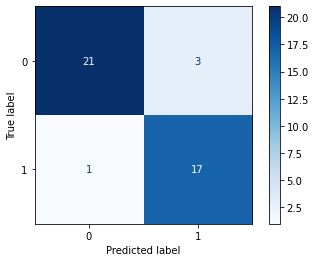

In [45]:
print(f' Test accuracy: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize=None)

### Grid Search and Random Search

If you have enough computational power for model training in a reasonable amount of time more sophisticated approach of hyperparameter tuning would be either Grid Search or Random Search.<br>

In a nutshell Grid Search allows you to pass through all different combinations of given model parameters and their values and choose the best combination. Whereas Random Search would randomly choose values for given model parameters and evaluate them on test data untill it reaches the specified number of iterations.<br>

More information here [Gentle introduction to Grid and Random search](https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318) and here [Detailed Explanation with code examples](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/).

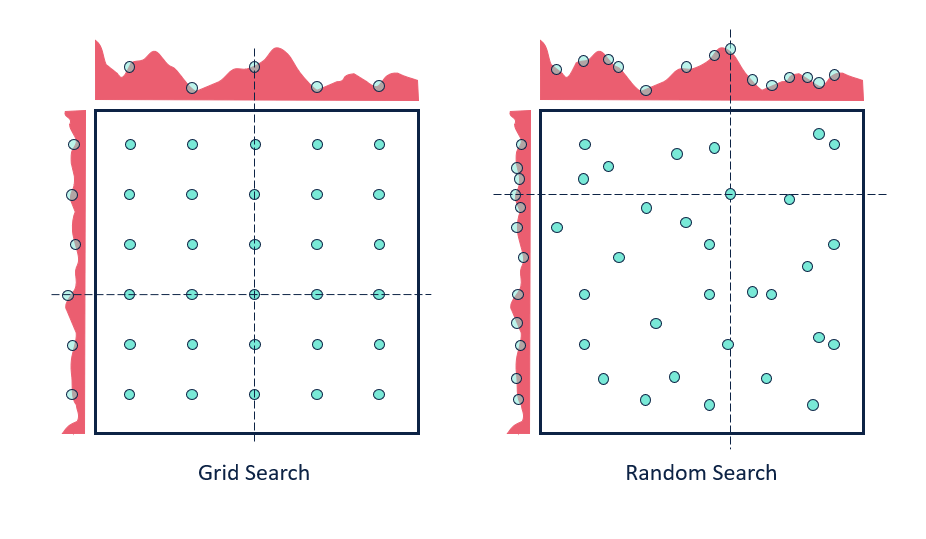

**Task 3 (1 point)**. Compare your previous results with [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) hyperparameter tuning. You may tune best hyperparameters for forest with several trees and then increase it while measure the quality on validation dataset.

In [47]:
# Create the parameter grid based on the results of random search 
#X_train, X_test = X_full
#y_train, y_test = y_full

param_grid = {
    'n_estimators': [5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': [ 5, 7, 15, 25, 35, 55],
    'max_depth': [10, 30, 50, 100, 150],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [1, 2, 3]
}

# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_full, y_full)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


C:\Users\bochk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.83778966 0.81354724 0.81336898]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 100, 150],
                         'max_features': [5, 7, 15, 25, 35, 55],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [5, 10, 20, 30, 50, 100]},
             verbose=1)

In [48]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [49]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy', 
                            max_features=7, max_depth=10, 
                            min_samples_split=2, min_samples_leaf=3,
                            bootstrap=False, n_jobs=-1, 
                            random_state=42, verbose=0)

rf_pipeline = Pipeline(steps=[('classifier', rf)])
clf = cross_val_score(rf_pipeline, X_full, y_full, scoring='accuracy', cv=5)
accuracy = clf.mean()
std = clf.std()
print(f'Train Accuracy/std using RFC is: {accuracy}/{std}')

Train Accuracy/std using RFC is: 0.8497326203208557/0.049255952683077864


In [50]:
clf = rf_pipeline.fit(X_full, y_full)

In [51]:
cv_score = cross_val_score(rf_pipeline, X_val, y_val, scoring='accuracy', cv=5).mean()
cv_score

0.7388888888888889

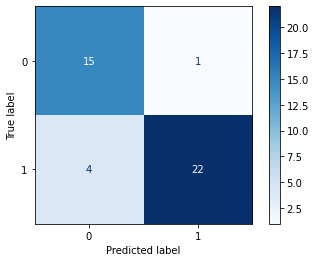

In [52]:
disp = plot_confusion_matrix(clf, X_val, y_val, cmap=plt.cm.Blues, normalize=None)

Train accuracy has dropped slightly, but validation score looks great - 0.74. In general I enjoied work with GridSearch more, because it didn't need that much manipulations as greedy search did. 

**Task 4 (1 point)**. And finally tune forest hyperparameters with [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Compare results to previous attempts.

In [55]:
# Create the parameter grid based on the results of random search 
#X_train, X_test = X_full
#y_train, y_test = y_full

param_distributions = {
    'n_estimators': [5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': [ 5, 7, 15, 25, 35, 55],
    'max_depth': [10, 30, 50, 100, 150],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [1, 2, 3]
}

# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_distributions, 
                          cv = 5, n_jobs = -1, verbose = 1, random_state=42)
rand_search.fit(X_full, y_full)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\bochk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78324421 0.80124777 0.80142602 0.8311943  0.78930481 0.78894831
        nan 0.81354724 0.80213904 0.8315508 ]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 30, 50, 100, 150],
                                        'max_features': [5, 7, 15, 25, 35, 55],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [5, 10, 20, 30, 50,
                                                         100]},
                   random_state=42, verbose=1)

In [56]:
rand_search.best_params_

{'n_estimators': 20,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 35,
 'max_depth': 100,
 'criterion': 'gini'}

In [57]:
rf = RandomForestClassifier(n_estimators=20, criterion='gini', 
                            max_features=35, max_depth=100, 
                            min_samples_split=3, min_samples_leaf=4,
                            bootstrap=False, n_jobs=-1, 
                            random_state=42, verbose=0)

rf_pipeline = Pipeline(steps=[('classifier', rf)])
clf = cross_val_score(rf_pipeline, X_full, y_full, scoring='accuracy', cv=5)
accuracy = clf.mean()
std = clf.std()
print(f'Accuracy/std using RFC is: {accuracy}/{std}')

Accuracy/std using RFC is: 0.7830659536541891/0.02314271995310872


In [58]:
clf = rf_pipeline.fit(X_full, y_full)

In [59]:
cv_score = cross_val_score(rf_pipeline, X_val, y_val, scoring='accuracy', cv=5).mean()
cv_score

0.6888888888888889

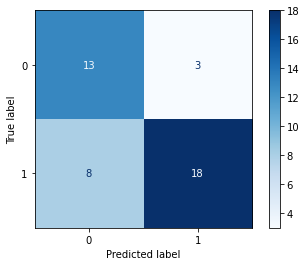

In [60]:
disp = plot_confusion_matrix(clf, X_val, y_val, cmap=plt.cm.Blues, normalize=None)

This model has shown the lowest accuracy score among previous 2, it's 0.78 on train and 0.68 on validation sample. But this search was extremely fast compare to GridSearch and greedy search, of course.

**Task 5 (0.5 points)**. Tell us about your experience in hyperparameter tuning with the approaches above. What do you think would be the best option for this task and why?

In this task i've tried 3 approaches: brut force greedy search, GridSearchCV and RandomizedSearchCV. 

Brut force greedy search gave the highest train accuracy, but this search itself was very annoying - I had to repeat fits and there always was a high chance for human mistake. Also it took much time and code doesn't look clean. Anyway, manually changed parameters range is effective sometimes, I think.

GridSearchCV has the medium train accuracy and pretty high validation score, I find this approach the most stable among all 3. It takes awile to process all fits, but it worth to wait. I think this method is best for those, who have powerful computer and need the most precise model.

RandomizedSearchCV is a very fast way to get a model which somehow works - this model has the lowest accuracy/validation score among 3. It's all about luck - it can give a powerful parameters, but you can't rely on random search if you need the best model possible.

In my opinion, for this dataset GridSearchCV is the best way to pick model parameters, because our dataset is small and process doesn't need that much computer sources.

### Desicion tree explained

Remember the [Titanic](https://www.kaggle.com/c/titanic) competition from last week? Wouldn't be a good idea to visualize one of possible desicion-making processes of _survived_ / _dead_ labeling?

**Task 6 (1 point)**. Load titanic dataset, split it into train/test parts, apply simple hyperparameter tuning of [DesicionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (use one of the approaches above) in order to have **test accuracy more than 0.65**. <br>

Draw the best tree decision making process. You may use [sklearn.tree.prot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).<br>

In [61]:
from sklearn.tree import DecisionTreeClassifier
import os

In [71]:
PATH = "./data/"
tit_data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [72]:
y_t = tit_data['Survived']
X_t = tit_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
X_t['Age'].fillna(value=28, inplace=True)
X_t['Embarked'].fillna(value='S', inplace=True)

In [73]:
X_tit = pd.get_dummies(X_t, columns=["Embarked", "Sex"])

In [74]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_tit, y_t, test_size=0.3, random_state=42)

In [75]:
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 5, 10, 50, 100, 200],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [3, 5, 7 , 15]
}

# Create a based model
dt = DecisionTreeClassifier(random_state=42)
# Instantiate the grid search model
rand_search = RandomizedSearchCV(estimator = dt, param_distributions = param_distributions, 
                          cv = 5, n_jobs = -1, verbose = 1, random_state=42)
rand_search.fit(X_t_train, y_t_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\bochk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78011613        nan 0.78655484 0.78495484
 0.78974194 0.77850323 0.78658065 0.78011613]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10, 50, 100, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [3, 5, 7, 15],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=1)

In [76]:
rand_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 15,
 'max_features': 'log2',
 'max_depth': 200,
 'criterion': 'entropy'}

In [77]:
dt = DecisionTreeClassifier(splitter='best', min_samples_split=3, min_samples_leaf=3,
                            max_leaf_nodes=15, max_features='log2', max_depth=200,
                            criterion='entropy', random_state=42)

rf_pipeline = Pipeline(steps=[('classifier', dt)])
clf = cross_val_score(rf_pipeline, X_t_train, y_t_train, scoring='accuracy', cv=5)
accuracy = clf.mean()
std = clf.std()
print(f'Accuracy/std using RFC is: {accuracy}/{std}')

Accuracy/std using RFC is: 0.789741935483871/0.04453217102256919


In [78]:
cv_score = cross_val_score(rf_pipeline, X_t_test, y_t_test, scoring='accuracy', cv=5).mean()
print(f'Titanic score is: {cv_score}.')

Titanic score is: 0.8062893081761008.


Accuracy score =0.80

### Decision tree

In [79]:
from sklearn import tree

In [80]:
clf = tree.DecisionTreeClassifier(splitter='random', min_samples_split=5, min_samples_leaf=5,
                                  max_leaf_nodes=15, max_features='auto', max_depth=3,
                                  criterion='entropy', random_state=42)
clf = clf.fit(X_tit, y_t)

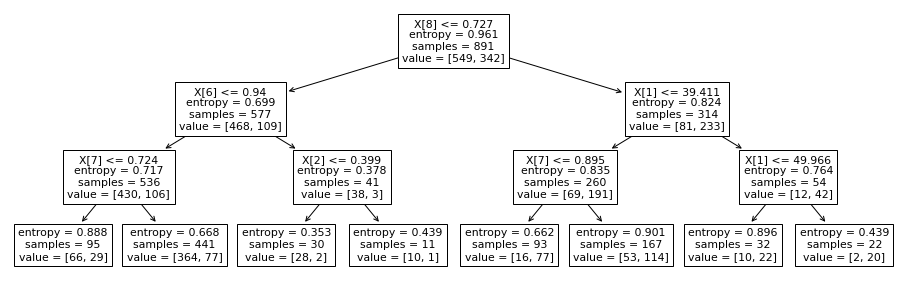

In [83]:
plt.figure(figsize=(16,5))
tree.plot_tree(clf)
plt.show()

Is it easy to interpret its results? Are you able to explain to a random person why would he survive / die on the titanic?

It's easy to say, that the 1st node is about sex = 891 total passengers later are divided into 2 groups: 577 males and 314 females. To understand the further nodes I need more time than I have right now, unfortunately) But in general, in trees with small depth it's possible to interpret such plots.

# Homework part 2. RandomForestRegressor

**Task 7 (2 points)**. Write your own *DecisionTreeRegressor* class with _MSE_ split criterion and settable parameter *max_depth*. Demonstrate its consistency on the proposed artificial data (or some other) by comparing MSE of train predictions with [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). <br>

Provide examples for different _max_depth_ parameter.

Of course you may re-use code for *DecisionTreeClassifier*. You need to figure out what needs to be changed in it for Classification -> Regression transformation.<br>

**! You are allowed to use only NumPy library** in this assigment.

In [ ]:
# Your code here

**Task 8 (2 points)**. Write your own _RandomForestRegressor_ class with MSE split criterion and settable parameter _max_depth_.  Demonstrate its consistency on the proposed artificial data (or some other) by comparing MSE of train predictions with [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).<br>

Provide examples for different max_depth parameter.<br>

**! You are allowed to use only NumPy library** in this assigment.

In [ ]:
# Your code here

# Homework part 3 (bonus). Speeding up forest training process

**Task 9 (3 points)** Devise a way to speed up training against the default version of our custom _RandomForestClassifier_ or your own _RandomForestRegressor_. You may want use [`joblib`](https://joblib.readthedocs.io/en/latest/) for parallelizing trees training. Provide graphs of time dependences on the number of trees in your _fast_ version with different number of cores / threads used against default one.

In [ ]:
# Your code here